<a href="https://colab.research.google.com/github/zhan0113/MachineLearning/blob/main/1_Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 梯度縮減(Gradient Descent)
以y = x^2的範例，說明深度學習網路如何透過可微分之函數逼近目標最小值

[5.00000000e+00 2.00000000e+00 8.00000000e-01 3.20000000e-01
 1.28000000e-01 5.12000000e-02 2.04800000e-02 8.19200000e-03
 3.27680000e-03 1.31072000e-03 5.24288000e-04 2.09715200e-04
 8.38860800e-05 3.35544320e-05 1.34217728e-05 5.36870912e-06]


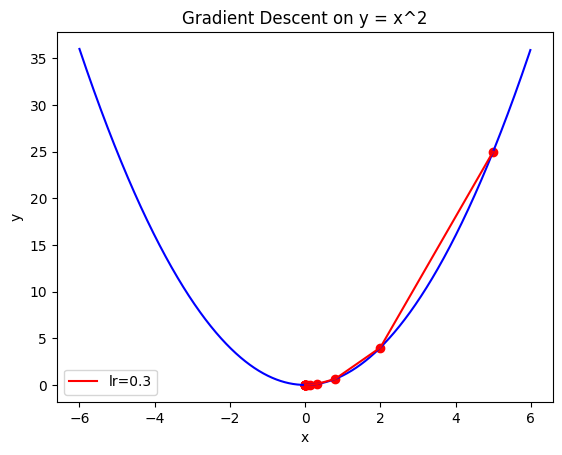

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# === 定義目標函數與其導數 ===
# 目標函數 y = x^2
def func(x):
    return np.square(x)   # np.square(x) = x^2

# 目標函數的一階導數 dy/dx = 2x
def dfunc(x):
    return 2 * x


# === 定義梯度下降法 (Gradient Descent) 函式 ===
def GD(x_start, df, epochs, lr):
    """
    梯度下降法：
    給定起始點與目標函數的一階導函數，反覆運算更新 x，
    直到達到指定的迭代次數 (epochs)。

    參數:
        x_start: 起始點
        df:      目標函數的一階導函數
        epochs:  反覆運算次數
        lr:      學習率 (Learning Rate)

    回傳:
        xs: 每次更新後的 x 值 (含起始點)，長度為 epochs + 1
    """

    xs = np.zeros(epochs + 1)  # 用來記錄每次迭代後的 x 值
    x = x_start                # 設定初始 x
    xs[0] = x                  # 紀錄初始值

    # 進行梯度下降更新
    for i in range(epochs):
        dx = df(x)             # 計算目前 x 的梯度 (導數)
        v = -dx * lr           # 更新幅度 (方向取負，表示往下降的方向)
        x += v                 # 更新 x 的值
        xs[i + 1] = x          # 紀錄新的 x

    return xs


# === 主程式區 ===
x_start = 5      # 起始點 (從 x = 5 開始)
epochs = 15      # 反覆運算次數
lr = 0.3         # 學習率 (控制每次更新的幅度)

# 執行梯度下降
x = GD(x_start, dfunc, epochs, lr=lr)

# 印出每次更新後的 x 值
print(x)

# === 繪圖區 ===
from numpy import arange
t = arange(-6.0, 6.0, 0.01)   # 生成 x 軸範圍 (-6 ~ 6)
plt.plot(t, func(t), c='b')   # 畫出目標函數 y = x^2 (藍色曲線)

# 畫出梯度下降過程的路徑
plt.plot(x, func(x), c='r', label=f'lr={lr}')
plt.scatter(x, func(x), c='r')  # 標出每次更新的點
plt.legend()                    # 顯示圖例
plt.title('Gradient Descent on y = x^2')  # 圖片標題
plt.xlabel('x')
plt.ylabel('y')

plt.show()  # 顯示圖形
